Data Exploration


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

# Check the first few rows
print(data.head())

# Check the summary statistics
print(data.describe())


      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
                 id          age  hypertension  heart_di

Data Preprocessing


In [ ]:
# Handle missing values if any
data.fillna(0, inplace=True)  # Replace missing values with 0 or appropriate values

# Convert categorical variables to numeric using one-hot encoding
data = pd.get_dummies(data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)


EDA

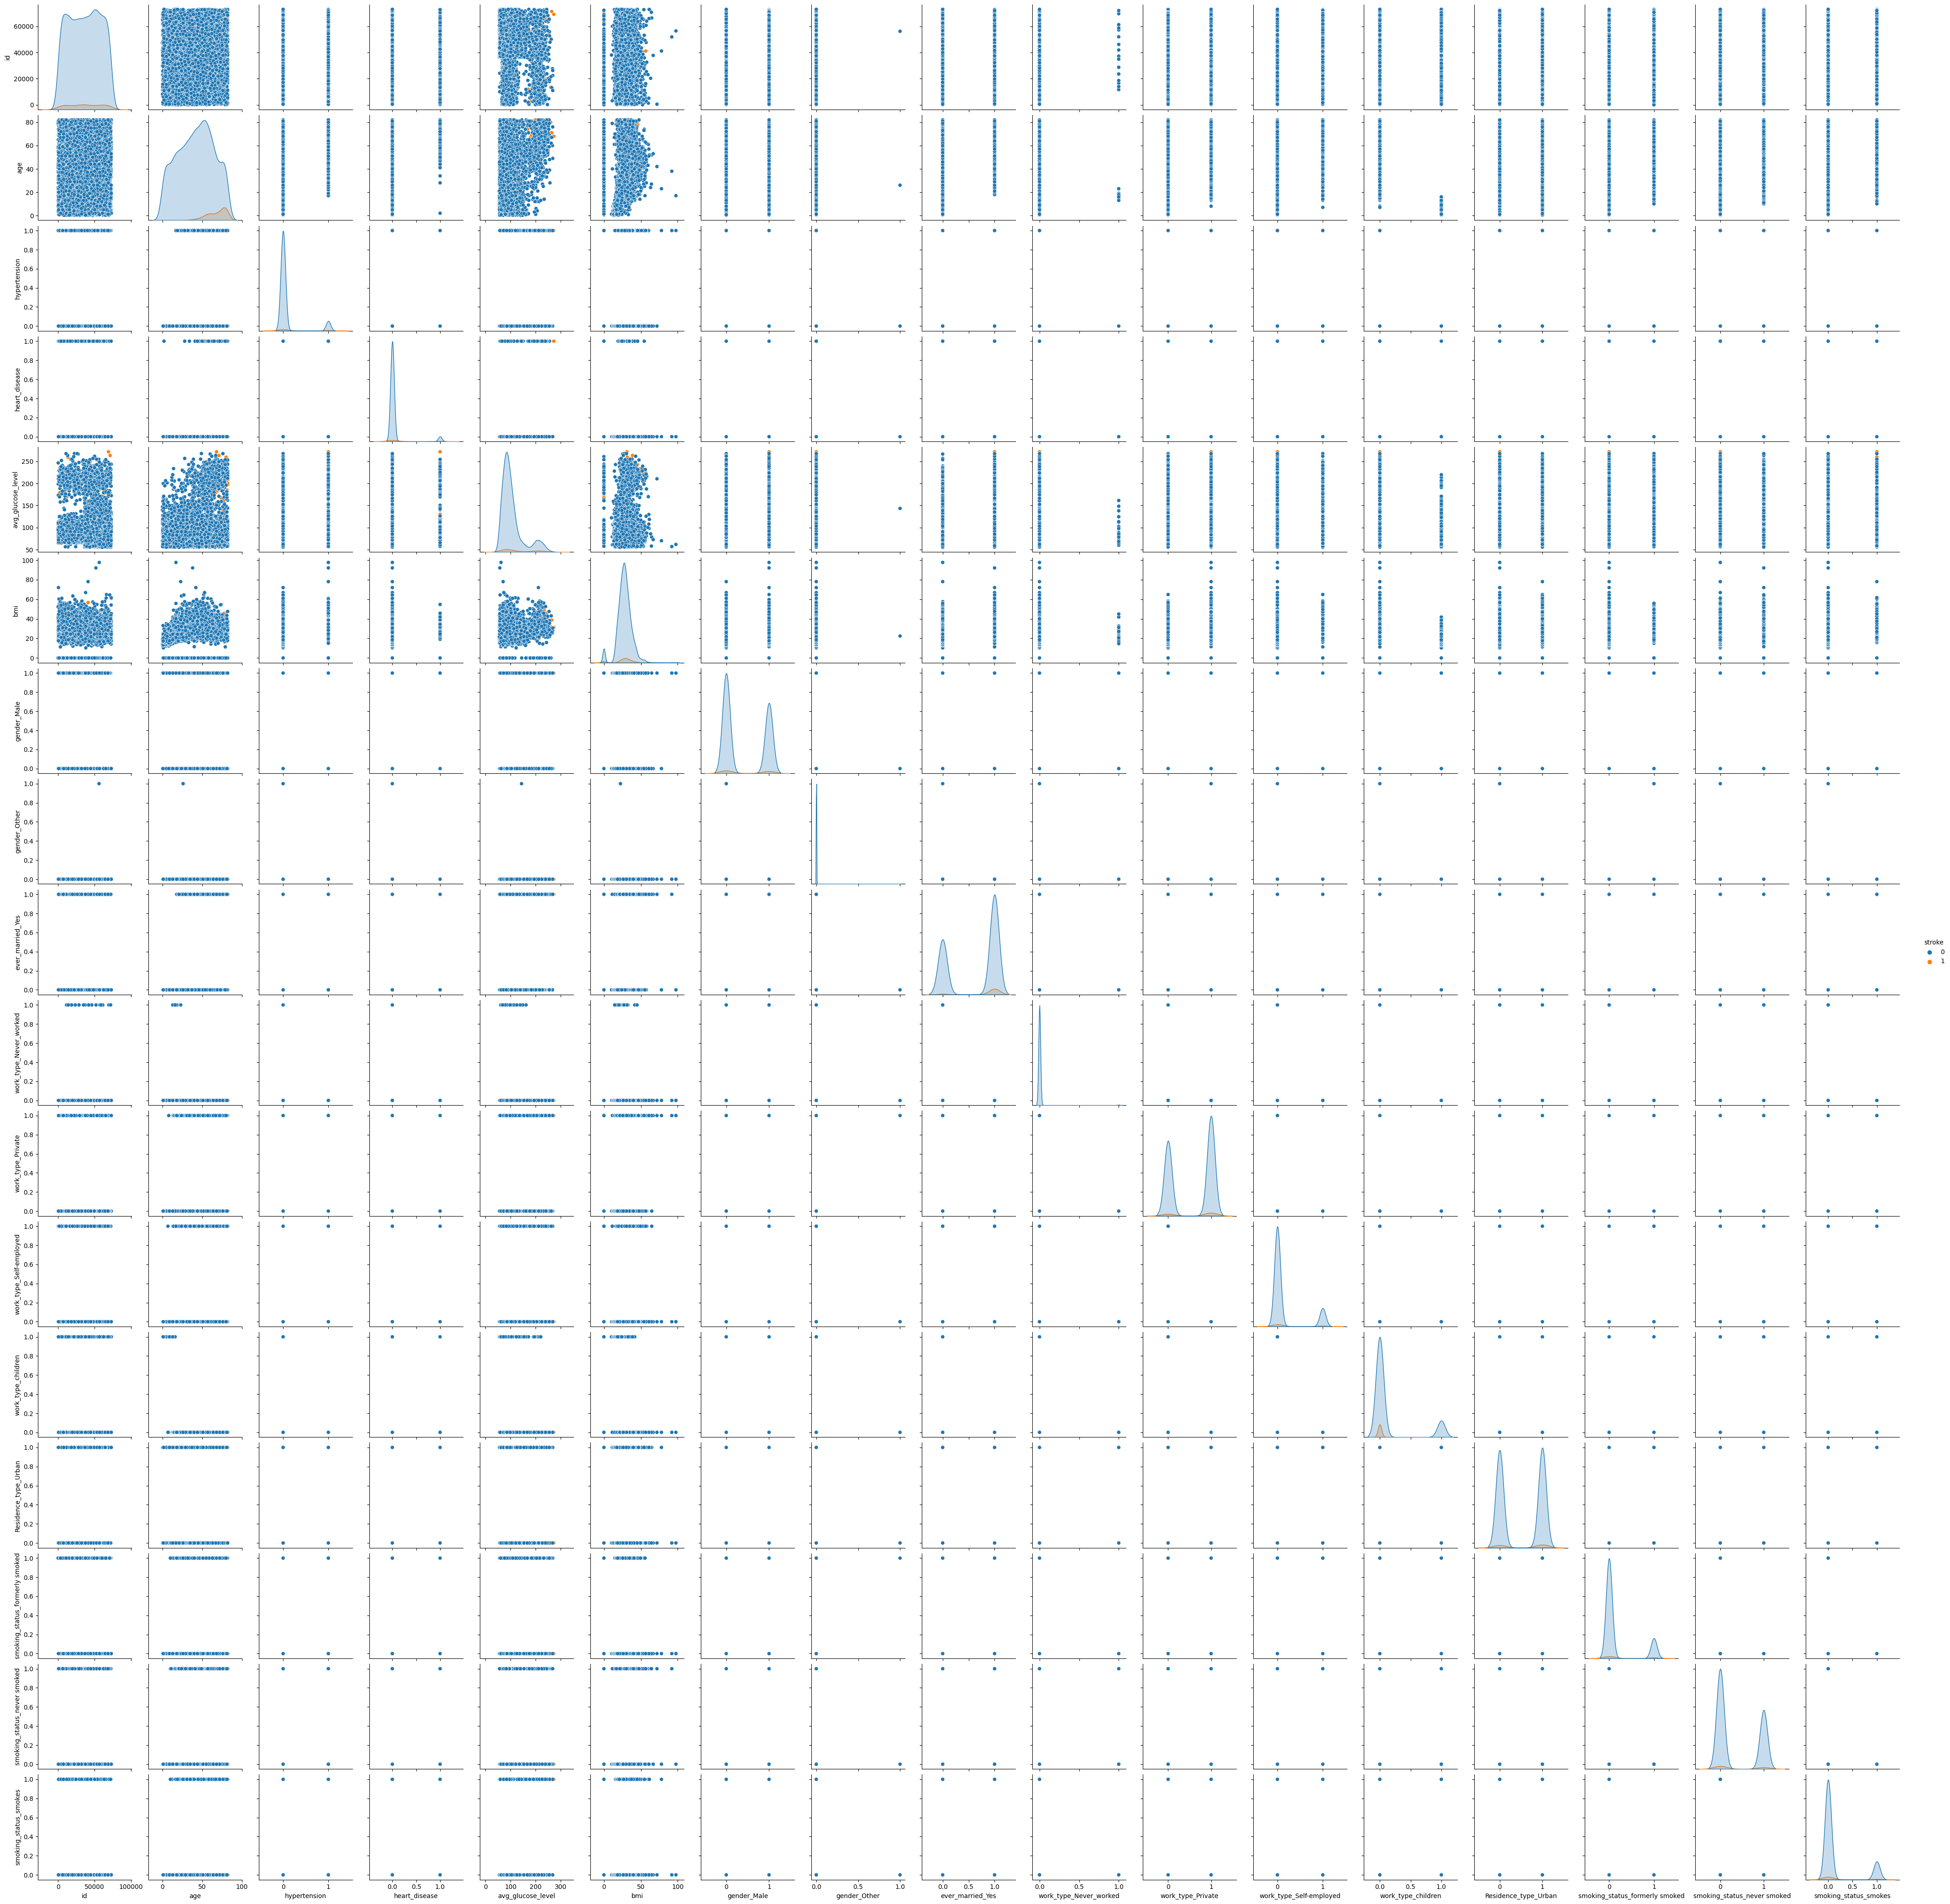

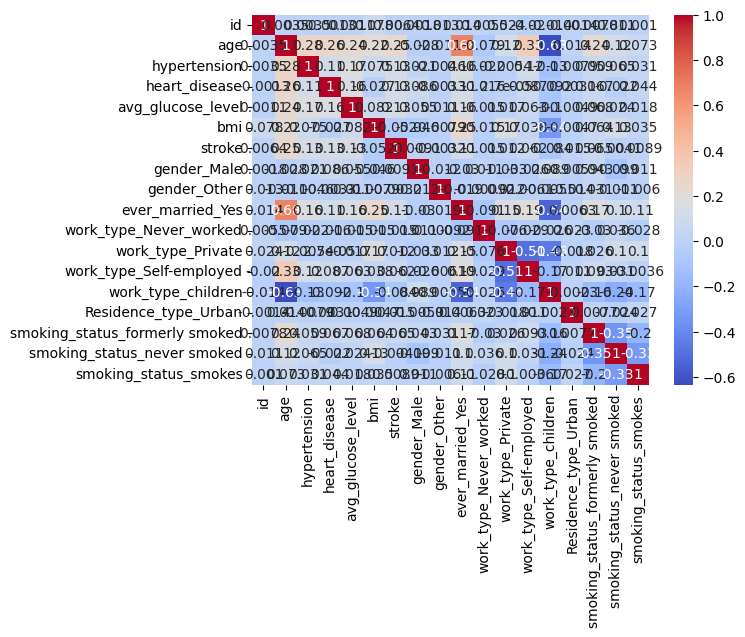

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize relationships
sns.pairplot(data, hue='stroke')
plt.show()

# Correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
print(data.columns)


Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')


Data Visualization for Stroke Prediction

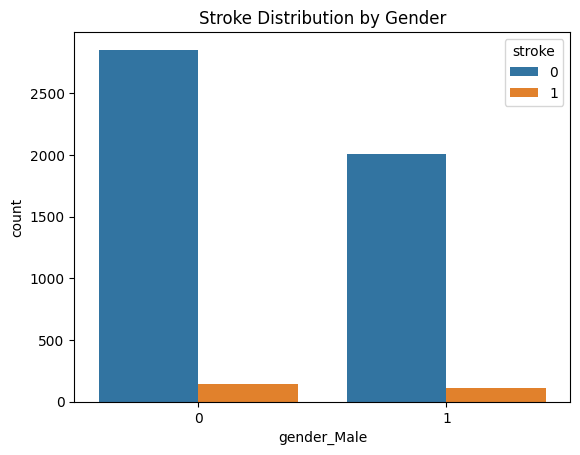

<ipython-input-6-5923a80a7bc6>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['stroke'] == 0]['age'], label='No Stroke', shade=True)
<ipython-input-6-5923a80a7bc6>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['stroke'] == 1]['age'], label='Stroke', shade=True)


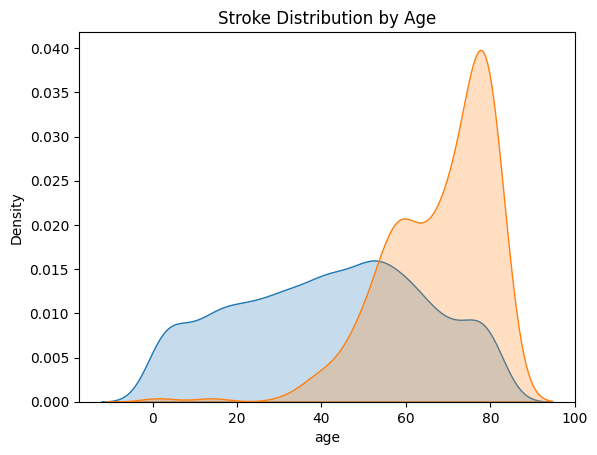

In [ ]:
# Stroke distribution by gender
sns.countplot(data=data, x='gender_Male', hue='stroke')
plt.title('Stroke Distribution by Gender')
plt.show()


# Stroke distribution by age
sns.kdeplot(data[data['stroke'] == 0]['age'], label='No Stroke', shade=True)
sns.kdeplot(data[data['stroke'] == 1]['age'], label='Stroke', shade=True)
plt.title('Stroke Distribution by Age')
plt.show()


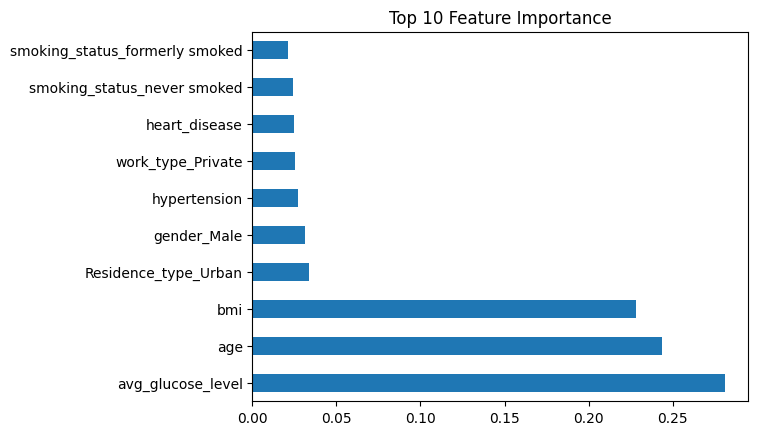

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = data.drop(columns=['id', 'stroke'])
y = data['stroke']

# Train a random forest classifier to get feature importance
clf = RandomForestClassifier()
clf.fit(X, y)

feature_importance = pd.Series(clf.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importance')
plt.show()


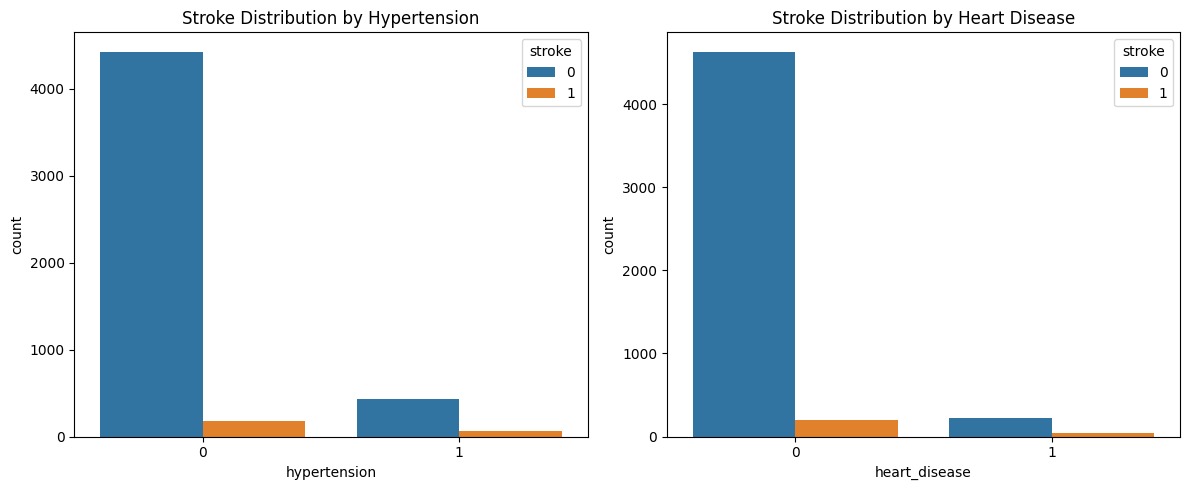

In [ ]:
# Hypertension and Stroke distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='hypertension', hue='stroke')
plt.title('Stroke Distribution by Hypertension')

plt.subplot(1, 2, 2)
sns.countplot(data=data, x='heart_disease', hue='stroke')
plt.title('Stroke Distribution by Heart Disease')

plt.tight_layout()
plt.show()


<ipython-input-10-ff7d82822552>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['stroke'] == 0]['avg_glucose_level'], label='No Stroke', shade=True)
<ipython-input-10-ff7d82822552>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['stroke'] == 1]['avg_glucose_level'], label='Stroke', shade=True)
<ipython-input-10-ff7d82822552>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['stroke'] == 0]['bmi'], label='No Stroke', shade=True)
<ipython-input-10-ff7d82822552>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0;

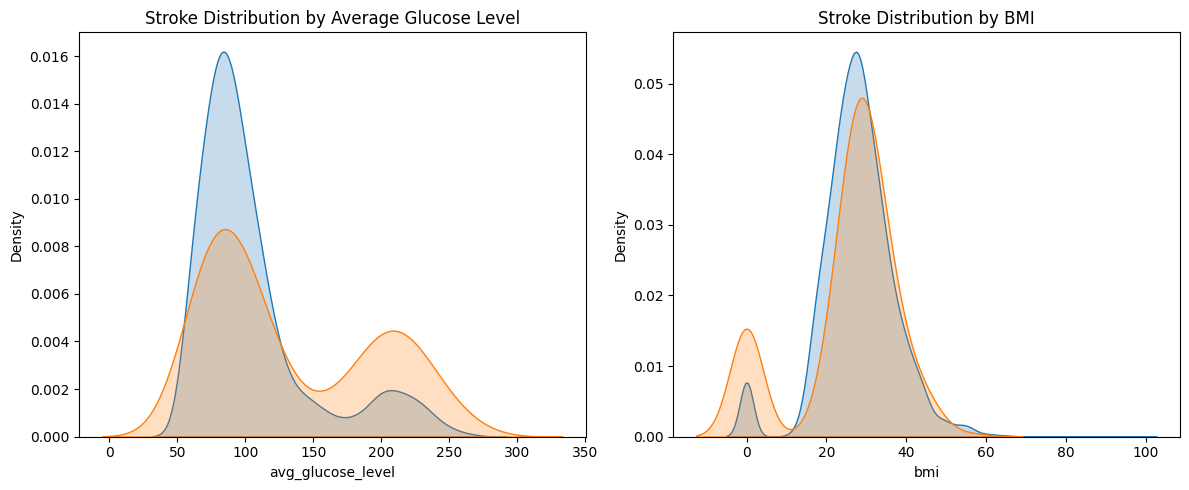

In [ ]:
# Average Glucose Level and BMI distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.kdeplot(data[data['stroke'] == 0]['avg_glucose_level'], label='No Stroke', shade=True)
sns.kdeplot(data[data['stroke'] == 1]['avg_glucose_level'], label='Stroke', shade=True)
plt.title('Stroke Distribution by Average Glucose Level')

plt.subplot(1, 2, 2)
sns.kdeplot(data[data['stroke'] == 0]['bmi'], label='No Stroke', shade=True)
sns.kdeplot(data[data['stroke'] == 1]['bmi'], label='Stroke', shade=True)
plt.title('Stroke Distribution by BMI')

plt.tight_layout()
plt.show()


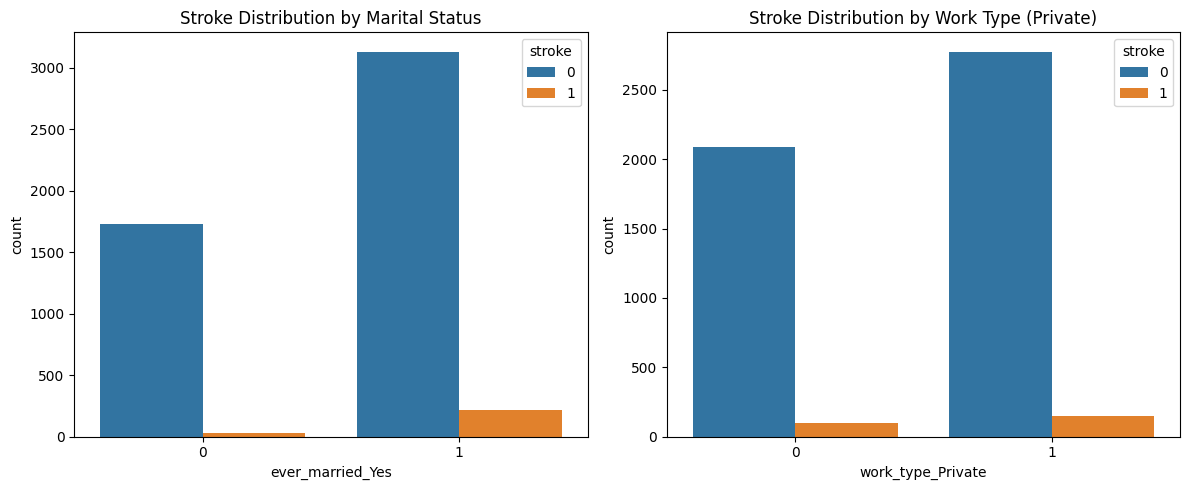

In [ ]:
# Marital Status distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='ever_married_Yes', hue='stroke')
plt.title('Stroke Distribution by Marital Status')

plt.subplot(1, 2, 2)
sns.countplot(data=data, x='work_type_Private', hue='stroke')
plt.title('Stroke Distribution by Work Type (Private)')

plt.tight_layout()
plt.show()


In [ ]:
print(data.columns)

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')


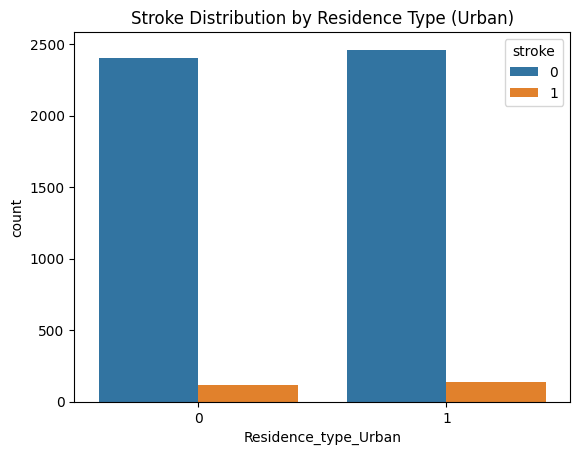

In [ ]:
# Residence Type distribution
sns.countplot(data=data, x='Residence_type_Urban', hue='stroke')
plt.title('Stroke Distribution by Residence Type (Urban)')
plt.show()



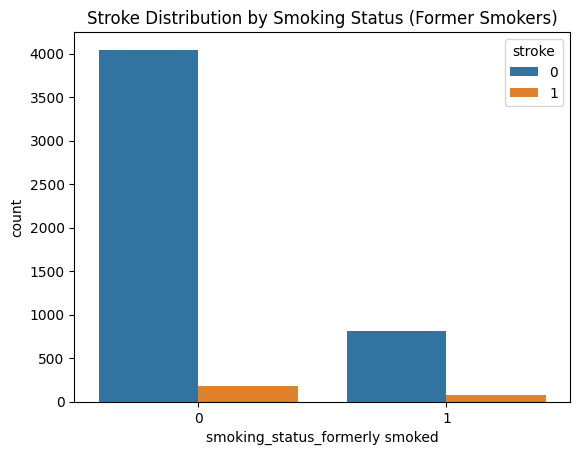

In [ ]:
# Smoking Status distribution
sns.countplot(data=data, x='smoking_status_formerly smoked', hue='stroke')
plt.title('Stroke Distribution by Smoking Status (Former Smokers)')
plt.show()



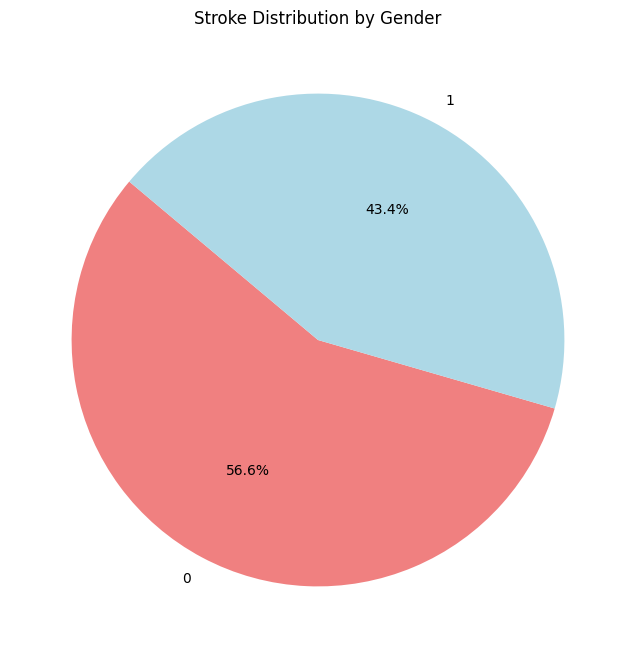

In [ ]:
# Pie chart for stroke distribution by gender
gender_counts = data[data['stroke'] == 1]['gender_Male'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values
colors = ['lightcoral', 'lightblue', 'lightgreen']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Stroke Distribution by Gender')
plt.show()



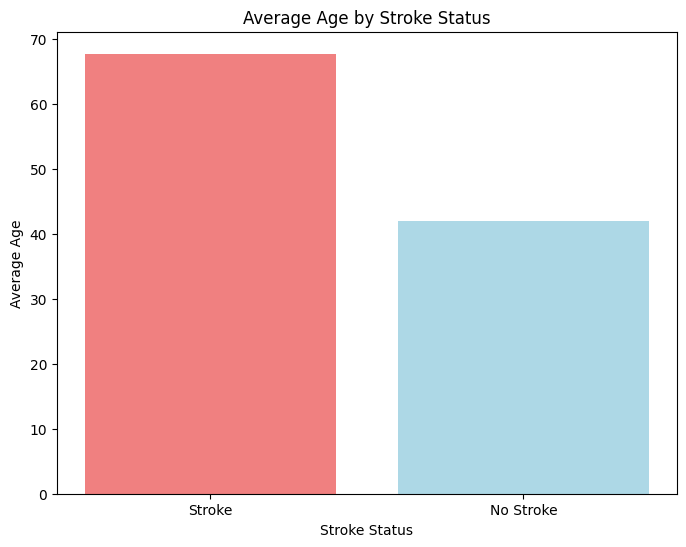

In [ ]:
import numpy as np

# Calculate the average age for stroke and non-stroke cases
average_age_stroke = np.mean(data[data['stroke'] == 1]['age'])
average_age_no_stroke = np.mean(data[data['stroke'] == 0]['age'])

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Stroke', 'No Stroke'], [average_age_stroke, average_age_no_stroke], color=['lightcoral', 'lightblue'])
plt.xlabel('Stroke Status')
plt.ylabel('Average Age')
plt.title('Average Age by Stroke Status')
plt.show()
